In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [2]:
import pandas as pd
df=pd.read_csv('/kaggle/input/../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [3]:
df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [4]:
df.sort_values('Author', inplace=True)
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
56,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction
57,Cutting for Stone,Abraham Verghese,4.6,4866,11,2011,Fiction
232,Milk and Vine: Inspirational Quotes From Class...,Adam Gasiewski,4.4,3113,6,2017,Non Fiction
133,Go the F**k to Sleep,Adam Mansbach,4.8,9568,9,2011,Fiction
529,What Should Danny Do? (The Power to Choose Ser...,Adir Levy,4.8,8170,13,2019,Fiction
...,...,...,...,...,...,...,...
265,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2017,Fiction
266,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2018,Fiction
267,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2019,Fiction
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction


In [5]:
df.drop_duplicates(subset="Name", keep=False, inplace=True)
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
232,Milk and Vine: Inspirational Quotes From Class...,Adam Gasiewski,4.4,3113,6,2017,Non Fiction
133,Go the F**k to Sleep,Adam Mansbach,4.8,9568,9,2011,Fiction
529,What Should Danny Do? (The Power to Choose Ser...,Adir Levy,4.8,8170,13,2019,Fiction
227,Make Your Bed: Little Things That Can Change Y...,Admiral William H. McRaven,4.7,10199,11,2017,Non Fiction
15,Adult Coloring Book Designs: Stress Relief Col...,Adult Coloring Book Designs,4.5,2313,4,2016,Non Fiction
...,...,...,...,...,...,...,...
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
330,The 5000 Year Leap,W. Cleon Skousen,4.8,1680,12,2009,Non Fiction
214,Leonardo da Vinci,Walter Isaacson,4.5,3014,21,2017,Non Fiction
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction


In [6]:
#First we will calculate the top ratings books.
df.sort_values('User Rating', ascending=False, inplace=True)
df
#This result states that the highest rating is 4.9

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
207,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9,11881,13,2018,Fiction
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,4.9,7758,18,2019,Fiction
303,Strange Planet (Strange Planet Series),Nathan W. Pyle,4.9,9382,6,2019,Fiction
...,...,...,...,...,...,...,...
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction
364,The Elegance of the Hedgehog,Muriel Barbery,4.0,1859,11,2009,Fiction
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


In [7]:
df1=df.groupby('User Rating')
df1

# Top 21 Books which gets the highest User Ratings along with their Authors

In [8]:
df2=df1.get_group(4.9)
df2


,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
207,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9,11881,13,2018,Fiction
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,4.9,7758,18,2019,Fiction
303,Strange Planet (Strange Planet Series),Nathan W. Pyle,4.9,9382,6,2019,Fiction
521,Unfreedom of the Press,Mark R. Levin,4.9,5956,11,2019,Non Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction


In [9]:
df3=df.sort_values(['Year','User Rating'], ascending=False)
df3

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,4.9,7758,18,2019,Fiction
303,Strange Planet (Strange Planet Series),Nathan W. Pyle,4.9,9382,6,2019,Fiction
521,Unfreedom of the Press,Mark R. Levin,4.9,5956,11,2019,Non Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
...,...,...,...,...,...,...,...
92,"Eat This, Not That! Thousands of Simple Food S...",David Zinczenko,4.3,956,14,2009,Non Fiction
520,Under the Dome: A Novel,Stephen King,4.3,6740,20,2009,Fiction
254,Olive Kitteridge,Elizabeth Strout,4.2,4519,12,2009,Fiction
429,The Lost Symbol,Dan Brown,4.2,8747,19,2009,Fiction


In [10]:
df3=df.Author.value_counts()
df3.head(5)

Jeff Kinney        12
Rick Riordan        9
Stephenie Meyer     7
J.K. Rowling        6
Dav Pilkey          5
Name: Author, dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# TOP 5 AUTHOR'S WHICH PUBLISHED MAXIMUM NO. OF BOOKS

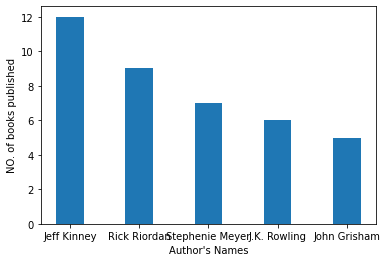

In [12]:
values=[12,9,7,6,5]
names=['Jeff Kinney',  'Rick Riordan',  'Stephenie Meyer',   'J.K. Rowling',   'John Grisham']
plt.xlabel("Author's Names" )
plt.ylabel("NO. of books published")
plt.bar(names,values,align='center',width=0.4)
plt.figsize=(40,10)


# MEAN PRICE OF BOOKS IN EACH YEAR 


Text(0, 0.5, 'MEAN PRICE PER YEAR')

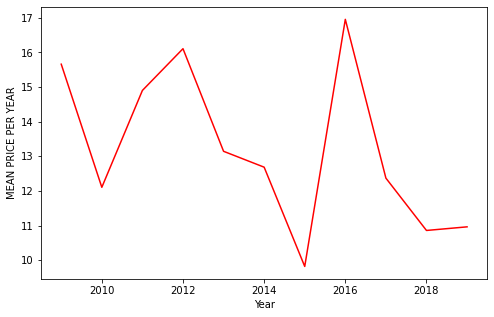

In [13]:

plt.figure(figsize=(8,5))
Mean_Price_Per_Year=df.groupby(['Year']).mean().Price
Mean_Price_Per_Year.plot(kind='line', color='Red')
plt.ylabel('MEAN PRICE PER YEAR')


In [14]:
a=df.Genre.str.count("Non Fiction").sum()
print(a)

139


In [15]:
#fiction = 255-139=116
Non_fiction = 139
fiction = 116

# ****** 'FICTION'   VS   'NON-FICTION' ******

([<matplotlib.patches.Wedge at 0x7fda796c10d0>,
 [Text(0.1553267578092338, 1.088978235920476, 'Fiction'),
  Text(-0.1553266558517328, -1.0889782504632117, 'NON-Fiction')],
 [Text(0.08472368607776389, 0.5939881286838959, '45%'),
  Text(-0.08472363046458152, -0.5939881366162972, '55%')])

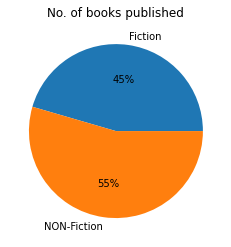

In [16]:
x=[116,139]
plt.title('No. of books published')
plt.pie(x,labels=['Fiction', 'NON-Fiction'],autopct='%1.0f%%')

   # EVALUATION

##  1. I have figured out top 21 books which got the highest ratings.
##  2. I have Analyzed and figured out the top 5 authors with maximum no. of books published.
##  3. I also reprsented the change in the price of books over the years.
##  4. At last I have also represented between the popularity of fiction and Non fiction on the criteria of no. of books published. 